
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W10/W10P1.ipynb)


In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import scipy

In [ ]:
def to_dataframe(text: str):
    """

    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)

    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L

def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch4data.zip
  !unzip "/content/ch4data.zip" -d "/content/ch4data/"
  if not os.getcwd() == '/content/ch4data':
    os.chdir("ch4data")
  else:
    print(f"Current directory is now {os.getcwd()}")
download_data()

In [3]:
data_ = to_dataframe("m-intcsp7309.txt")
data_

,date,intc,sp
0,19730131,0.010050,-0.017111
1,19730228,-0.139303,-0.037490
2,19730330,0.069364,-0.001433
3,19730430,0.086486,-0.040800
4,19730531,-0.104478,-0.018884
...,...,...,...
439,20090831,0.062857,0.033560
440,20090930,-0.036909,0.035723
441,20091030,-0.023505,-0.019762
442,20091130,0.012036,0.057364


In [4]:
data= data_["intc"]

In [5]:
log_1 = lambda x: np.log(x+1)

In [6]:
data = data.apply(log_1)

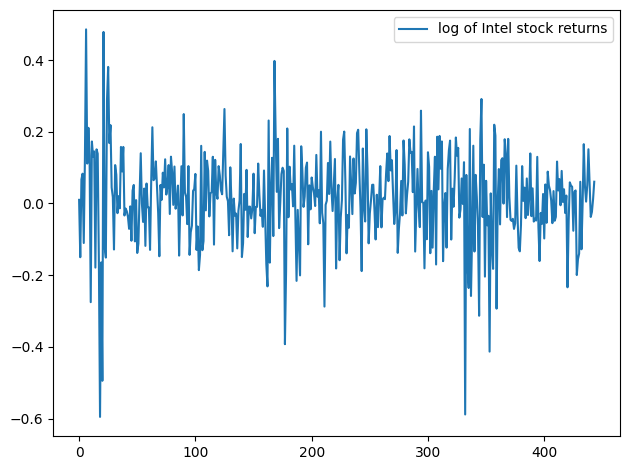

In [7]:
plt.plot(data, label = "log of Intel stock returns")
plt.legend()
plt.tight_layout()

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

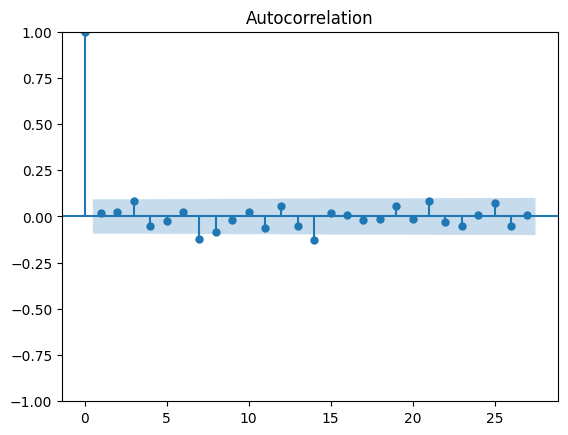

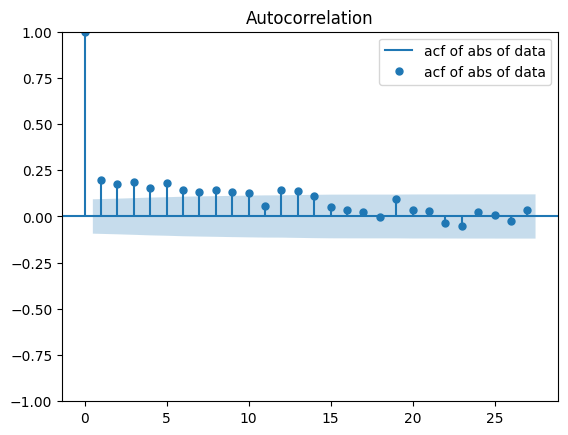

In [9]:
plot_acf(data);
plot_acf(abs(data), label = "acf of abs of data");
plt.legend()

In [10]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [11]:
acorr_ljungbox(data, return_df = True, lags = 12) ### ne serieal correlation, this dude behaves like a white noise!

,lb_stat,lb_pvalue
1,0.171171,0.679074
2,0.431654,0.805875
3,3.448687,0.327478
4,4.556762,0.335870
5,4.788221,0.442269
6,4.999654,0.543857
7,11.643678,0.112903
8,14.953145,0.060063
9,15.110961,0.087933
10,15.420802,0.117457


In [12]:
acorr_ljungbox(abs(data), return_df = True, lags = 12) ### there is serieal correlation of absolute value of data

,lb_stat,lb_pvalue
1,17.138790,3.474539e-05
2,31.035392,1.822847e-07
3,46.700876,4.023963e-10
4,57.525443,9.598012e-12
5,72.455598,3.156807e-14
6,81.880360,1.460102e-15
7,90.060544,1.202322e-16
8,99.227412,6.140579e-18
9,107.239390,5.357827e-19
10,114.392617,6.920157e-20


In [13]:
np.mean(data) #### appears to have mean 0.014

0.0143272998932954

In [14]:
scipy.stats.ttest_1samp(data, 0) ### net equal to 0

TtestResult(statistic=2.3788096285662776, pvalue=0.017791510128550684, df=443)

##Go back to slides please!

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
mod = ARIMA(data, order = (0,0,0))  ### we fit the mean equation
model = mod.fit()

In [18]:
at = model.resid

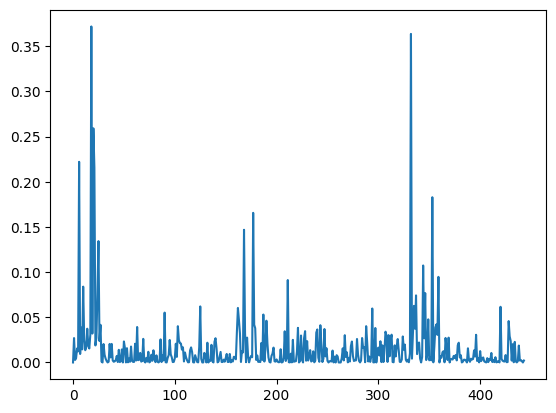

In [19]:
plt.plot(np.square(at))

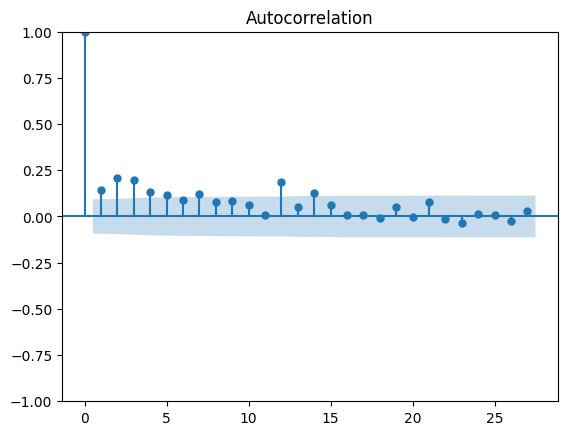

In [20]:
plot_acf(np.square(at));

In [21]:
acorr_ljungbox(np.square(at), return_df = True) ### there is serieal correlation of the residuals therefore an ARCH effect is present.

,lb_stat,lb_pvalue
1,9.413683,2.153722e-03
2,28.710337,5.829477e-07
3,45.887155,5.993622e-10
4,53.790775,5.821221e-11
5,59.840537,1.311263e-11
6,63.321386,9.492126e-12
7,69.906859,1.542866e-12
8,72.510162,1.552309e-12
9,75.676726,1.161629e-12
10,77.310472,1.686344e-12


[See here](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_arch.html)  for Engel's Het test.

In [24]:
statsmodels.stats.diagnostic.het_arch(at, nlags = 12) ####There is a strong ARCH effect here!

(53.90124090435578,
 2.845897921453057e-07,
 4.977672145972329,
 9.739345398055665e-08)